In [1]:
# Import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# Load the data 

dunking_data = pd.read_csv('data/dunking-data.csv')
microscopy_data = pd.read_csv('data/microscopy-data.csv')
tr1_data = pd.read_csv('data/tr-1.csv')
tr2_data = pd.read_csv('data/tr-2.csv')
tr3_data = pd.read_csv('data/tr-3.csv')

microscopy_data

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07
...,...,...,...,...,...,...
495,0.077699,1.481847,0.000989,0.006078,21.967531,4.751893e-07
496,0.067776,1.488293,0.001011,0.006595,18.163634,8.798032e-07
497,0.074166,1.554817,0.000997,0.003041,18.000978,8.652230e-07
498,0.081415,1.439910,0.001011,0.009119,19.136713,8.128785e-07


In [3]:
import numpy as np

def calculate_L(gamma, r, t, phi, eta):
    """
    Calculate the distance that the fluid travels into the solid.

    Parameters:
    gamma: the surface tension of the liquid
    r: the radius of the capillary pore
    t: the length of time for the capillary flow to occur
    phi: the contact angle between the solid and the liquid
    eta: the dynamic viscosity of the liquid

    Returns:
    L: the distance that the fluid travels into the solid
    """
    L = np.sqrt((gamma * r * t * np.cos(phi)) / (2 * eta))
    return L

In [4]:
dunking_data

,gamma,phi,eta,L,t,biscuit
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob
...,...,...,...,...,...,...
2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive
2996,0.067928,1.487239,0.000993,0.003933,12.256570,Hobnob
2997,0.059526,1.444489,0.000998,0.007583,26.464108,Hobnob
2998,0.071386,1.212213,0.001004,0.013988,22.772293,Digestive


In [5]:
microscopy_data["L_washburn"] = calculate_L(microscopy_data["gamma"], microscopy_data["r"], microscopy_data["t"], microscopy_data["phi"], microscopy_data["eta"])
microscopy_data["L_washburn_residuals"] = microscopy_data["L"] - microscopy_data["L_washburn"]

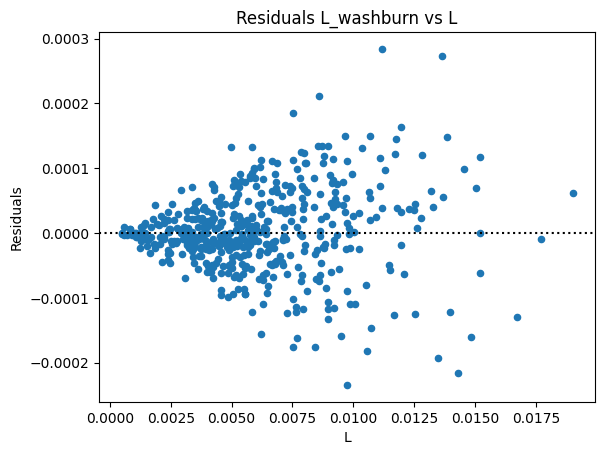

In [6]:
microscopy_data.plot(x='L', y='L_residuals', kind='scatter')
plt.xlabel('L')
plt.ylabel('Residuals')
plt.title('Residuals L_washburn vs L')

plt.axhline(y=0.0, color='black', linestyle='dotted')

plt.show()


In [7]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = microscopy_data[['gamma', 'r', 't', 'phi', 'eta']]
y = microscopy_data['L']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for linear regression
linear_pipeline = Pipeline([
    ('linear', LinearRegression())
])

# Create a pipeline for random forest regression
rf_pipeline = Pipeline([
    ('random_forest', RandomForestRegressor())
])

# Create a pipeline for ElasticNet regression
elasticnet_pipeline = Pipeline([
    ('elasticnet', ElasticNet(alpha=1.0, l1_ratio=0.5))
])

# Create a pipeline for Support Vector regression
svr_pipeline = Pipeline([
    ('svr', SVR(kernel='sigmoid', C=1.0, epsilon=0.1))
])

# Create a pipeline for Decision Tree regression
tree_pipeline = Pipeline([
    ('tree', DecisionTreeRegressor(max_depth=2))
])

# Create a pipeline for Gradient Boosting regression
gbr_pipeline = Pipeline([
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error'))
])

# Create a pipeline for Ridge regression
ridge_pipeline = Pipeline([
    ('ridge', Ridge())
])

# Create a pipeline for Lasso regression
lasso_pipeline = Pipeline([
    ('lasso', Lasso())
])

# Create a pipeline for MLPRegressor (a simple neural network)
nn_pipeline = Pipeline([
    ('scaling', StandardScaler()),  # It's important to scale inputs for neural networks
    ('nn', MLPRegressor(hidden_layer_sizes=(500, 500), shuffle=True, activation='tanh',learning_rate="adaptive", solver='lbfgs', max_iter=1000, random_state=42))
])

# List of pipelines for ease of iteration
pipelines = [ridge_pipeline, lasso_pipeline, elasticnet_pipeline, svr_pipeline, tree_pipeline, gbr_pipeline, linear_pipeline, rf_pipeline, nn_pipeline]

# Dictionary of pipelines and regressor types for ease of reference
pipe_dict = {0: 'Ridge', 1: 'Lasso', 2: 'ElasticNet', 3: 'Support Vector', 4: 'Decision Tree', 5: 'Gradient Boosting', 6: 'Linear', 7: 'Random Forest', 8: "Neural Network"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))


Ridge pipeline test accuracy: 0.681
Lasso pipeline test accuracy: -0.017
ElasticNet pipeline test accuracy: -0.017
Support Vector pipeline test accuracy: -1.995
Decision Tree pipeline test accuracy: 0.562
Gradient Boosting pipeline test accuracy: 0.736
Linear pipeline test accuracy: 0.898
Random Forest pipeline test accuracy: 0.927
Neural Network pipeline test accuracy: -1.921


In [12]:
from sklearn.model_selection import GridSearchCV

# Define a dictionary of hyperparameters to optimize
parameters = {
    'nn__hidden_layer_sizes': [(50,), (100,), (50,50), (50,50,50,50), (100,100), (100,100,100,100), (100,100,100,100,100)],
    'nn__activation': ['tanh', 'relu', 'logistic'],
    'nn__solver': ['sgd', 'adam'],
    'nn__alpha': [0.0001, 0.05],
    'nn__learning_rate': ['constant','adaptive'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(nn_pipeline, parameters, n_jobs=-1, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_

# Print the best parameters
print(best_parameters)

# Use the best parameters to create the best model
best_nn_pipeline = grid_search.best_estimator_

# Fit the best model to the data
best_nn_pipeline.fit(X_train, y_train)

# Print the score of the best model
print('Best Neural Network pipeline test score: %.3f' % best_nn_pipeline.score(X_test, y_test))

{'nn__activation': 'relu', 'nn__alpha': 0.05, 'nn__hidden_layer_sizes': (100, 100, 100, 100), 'nn__learning_rate': 'constant', 'nn__solver': 'adam'}
Best Neural Network pipeline test score: -0.049


In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Best initial models: RF and linear 
# Tuning models: RF 


# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the Random Forest regressor
rf = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters for Random Forest:", best_params)


Best parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Continue with chosen model 

# Predict the L_washburn values using the best model
